# Projet Big Data - Bloch Soline

Importation des bibliotheque

In [1]:
import sklearn as sk
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm, tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,export_text
#from sklearn.tree import export_text
#from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
#from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
#from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import pandas as pd 
import seaborn as sns
import numpy as np
import graphviz 
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import XGBRegressor

C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
pd.options.mode.chained_assignment = None  # default='warn'

Importation des données

In [3]:
raw_data = pd.read_csv("BDD.csv")

## Exploration des données 


Matrice de corrélation sur toutes les données, puis sur les subsets

In [4]:
corr = raw_data.corr()

<AxesSubplot:>

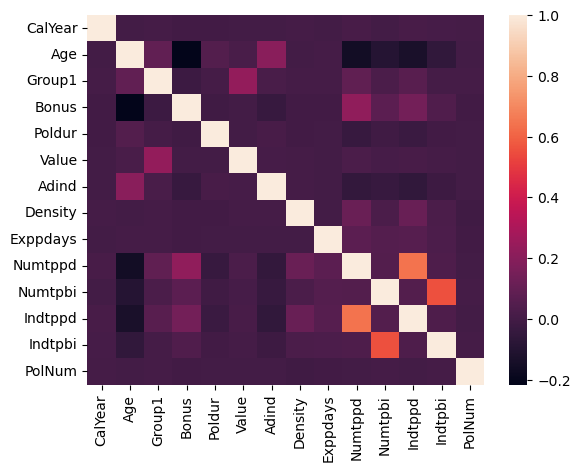

In [5]:
# plot the heatmap
sns.heatmap(corr, 
    xticklabels=corr.columns,
    yticklabels=corr.columns)

Nous sélectionnons les varibales qui nous intéressent pour faire un subset et on crée une nouvelle variable accident qui nous indique si l'assuré a eu un accident ou non.

<AxesSubplot:>

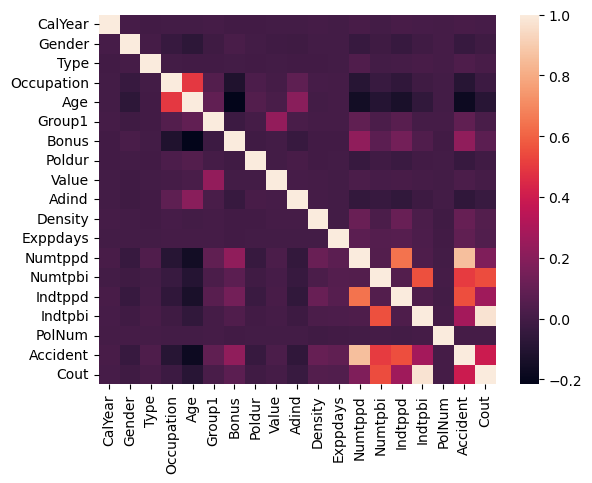

In [6]:
data_cook = raw_data 
data_cook['Gender'].replace(['Male', 'Female'],
                        [0, 1,], inplace=True) # Si c'est une femme on met un 1 

data_cook['Type'].replace(['A', 'B','C','D','E','F'],
                        [0,1,2,3,4,5], inplace=True)

data_cook['Occupation'].replace(['Employed', 'Unemployed','Housewife','Self-employed','Retired'],
                        [0,1,2,3,4,], inplace=True)
data_cook['Accident'] = np.where((data_cook['Numtppd']!= 0)| (data_cook['Numtpbi']!= 0), 1, 0)
#data_cook.drop('Numtppd', inplace=True, axis=1)
#data_cook.drop('Numtpbi', inplace=True, axis=1)
data_cook['Cout']= data_cook['Indtppd'] +data_cook['Indtpbi']

corr2 = data_cook.corr()
sns.heatmap(corr2, 
        xticklabels=corr2.columns,
        yticklabels=corr2.columns)

In [7]:
data = data_cook[["Gender", "Age", "Type", "Occupation","Accident"]]

Ici, on ne s'interessera pas à la distinction entre les accidents corporels ou matériels on ne s'interesse qu'à l'occurence d'un accident. Bien entendu les variables Cout et accident sont corrélés avec les variables décrivant le nombre de sinistres corporels et le nombres de sinistres matériels et leur coûts.
Nous avons crée un dataframe avec les informations que l'on pourrait demander pour une souscription express et la variable nous indiquant si l'assuré a eu un accient où non.

Parmi nos assurés nous avons eu 15,79% d'entre eux qui ont eu un accident.

In [8]:
tab_nbr_Accident = data["Accident"].value_counts()
prc_Accident = (tab_nbr_Accident[1]/(tab_nbr_Accident[1]+tab_nbr_Accident[0]))*100
print(prc_Accident,'%')

15.790000000000001 %


On change nos variables pour les mettre en numero car on ne peut pas les garder

On transforme la sorties de nos variables qualitatives par des nombres afin que cela puisse être lu par le SVM.

On refait une matrice de corrélation

<AxesSubplot:>

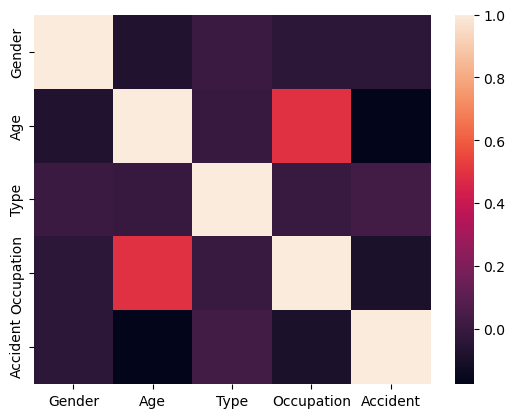

In [9]:
corr = data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

Ici on remarque une corrélation entre les variable Age et Occupation qui est logique, des personnes jeunes sont plus souvent étudiantes et des personnes âgées sont plus souvent retraités.

# Partie prédiction accident ou non 

In [10]:
X=data[["Gender","Age","Type","Occupation"]]
y=data[["Accident"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

In [11]:
X_train

,Gender,Age,Type,Occupation
36406,0,57,1,2
64580,0,33,3,1
67809,0,21,3,0
38127,1,32,1,0
31510,0,71,4,4
...,...,...,...,...
4976,0,41,2,3
69465,0,46,0,3
26785,1,53,5,4
13537,0,35,4,3


# SVM 

In [ ]:
#clf = svm.SVC()
#clf.fit(X_train, y_train)

In [ ]:
#clf.score(X_test, y_test, sample_weight=None)

# KNN

In [12]:
neigh = KNeighborsClassifier(n_neighbors=8)
neigh.fit(X_train, y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=8)

In [13]:
neigh.score(X_test, y_test, sample_weight=None)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8365

In [14]:
scaler = StandardScaler()
scaler.fit(X_train)

X_scaler_train = scaler.transform(X_train)
X_scaler_test = scaler.transform(X_test)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

The optimal number of neighbors is 8


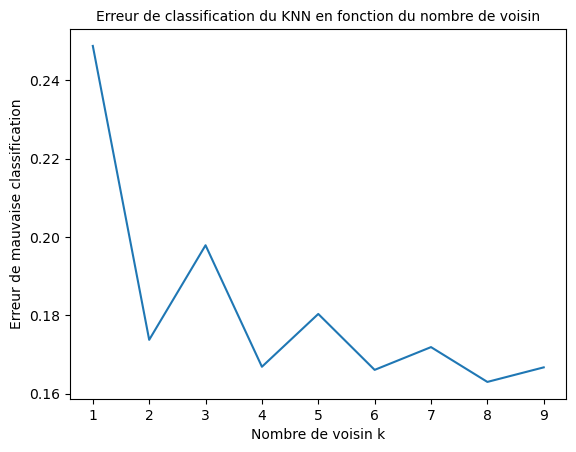

In [15]:
neighbors = list(range(1, 10, 1))
cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaler_train, y_train.values.ravel(), cv=5, scoring='accuracy')
    cv_scores.append(scores.mean(keepdims=True))
mse = [1 - x for x in cv_scores]
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))
plt.plot(neighbors, mse)
plt.title("Erreur de classification du KNN en fonction du nombre de voisin", fontsize=10)
plt.xlabel("Nombre de voisin k")
plt.ylabel("Erreur de mauvaise classification")
plt.show()

Le nombre de voisin optimal pour le Knn est ici de 8 voisin on observe tout de même une certaine volatilité dans ce modèle

# Decision Tree

In [16]:
list(X_train.columns)

['Gender', 'Age', 'Type', 'Occupation']

[Text(0.5, 0.8333333333333334, 'Age <= 29.5\ngini = 0.266\nsamples = 64000\nvalue = [53898, 10102]'),
 Text(0.25, 0.5, 'Gender <= 0.5\ngini = 0.395\nsamples = 15760\nvalue = [11483, 4277]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.43\nsamples = 9398\nvalue = [6461, 2937]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.333\nsamples = 6362\nvalue = [5022, 1340]'),
 Text(0.75, 0.5, 'Occupation <= 3.5\ngini = 0.212\nsamples = 48240\nvalue = [42415, 5825]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.236\nsamples = 39775\nvalue = [34347, 5428]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.089\nsamples = 8465\nvalue = [8068, 397]')]

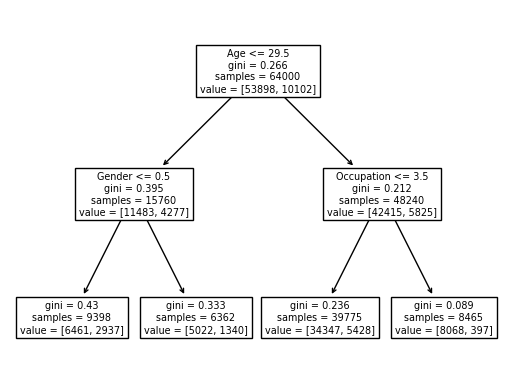

In [17]:
decision_tree = tree.DecisionTreeClassifier(max_depth=2)
decision_tree = decision_tree.fit(X_train, y_train)
tree.plot_tree(decision_tree, feature_names=list(X_train.columns))
#L'indice de diversité de Gini peut être calculé en sommant la probabilité pour 
#chaque élément d'être choisi, multipliée par la probabilité qu'il soit mal classé.
#Value c'est le nombre d'individus dans chaqe classe

In [18]:
decision_tree.score(X_test, y_test, sample_weight=None)

0.841875

Nous allons tenter de faire un arbre de décision et une regression avec seulement les variables Age et Genre

In [78]:
X_agegender=data[["Gender","Age"]]
y_agegender=data[["Accident"]]

X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(X_agegender, y_agegender, test_size=0.20, shuffle=True)

[Text(0.5, 0.8333333333333334, 'Age <= 29.5\ngini = 0.267\nsamples = 64000\nvalue = [53833, 10167]'),
 Text(0.25, 0.5, 'Gender <= 0.5\ngini = 0.399\nsamples = 15779\nvalue = [11443, 4336]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.432\nsamples = 9414\nvalue = [6447, 2967]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.338\nsamples = 6365\nvalue = [4996, 1369]'),
 Text(0.75, 0.5, 'Age <= 47.5\ngini = 0.213\nsamples = 48221\nvalue = [42390, 5831]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.241\nsamples = 28064\nvalue = [24124, 3940]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.17\nsamples = 20157\nvalue = [18266, 1891]')]

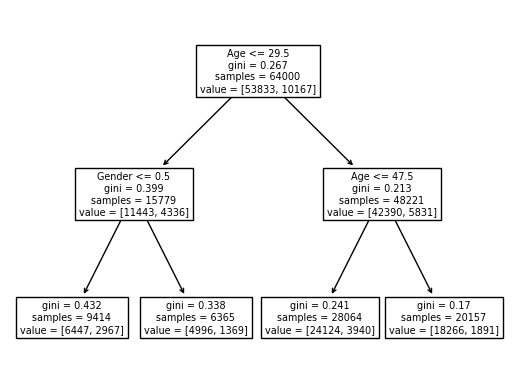

In [79]:
decision_tree_AgeGender = tree.DecisionTreeClassifier(max_depth=2)
decision_tree_AgeGender = decision_tree_AgeGender.fit(X_train_age, y_train_age)
tree.plot_tree(decision_tree_AgeGender, feature_names=list(X_train_age.columns))

In [80]:
decision_tree_AgeGender.score(X_test_age,y_test_age)

0.8459375

In [19]:
data_agg= data_cook.groupby('Age', as_index=False).agg('sum')
data_agg.shape

(58, 19)

Text(0, 0.5, "Nombre d'accident")

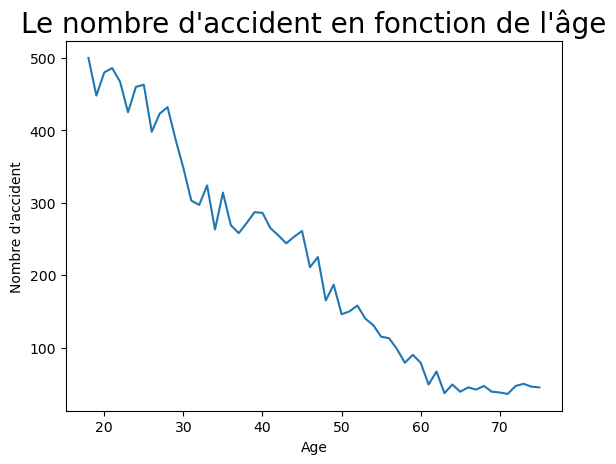

In [20]:
plt.plot(data_agg["Age"], data_agg["Accident"])
plt.title("Le nombre d'accident en fonction de l'âge", fontsize=20)
plt.xlabel('Age')
plt.ylabel("Nombre d'accident")

Pour confirmer qu'il semble que les jeunes ont plus d'accident que les personnes âgées nous allons regarder la composition du portefeuille au niveau des âges

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


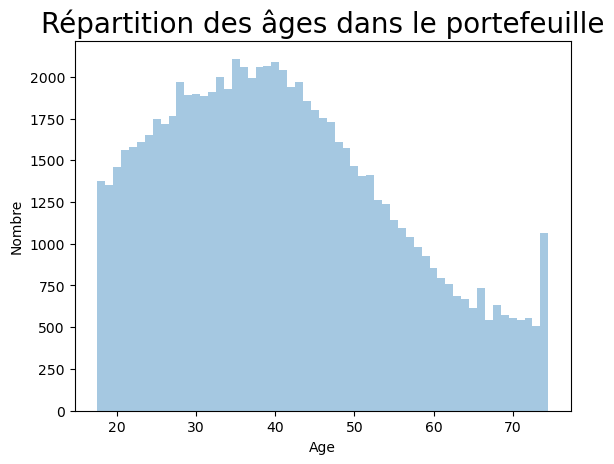

In [21]:
sns.distplot(data_cook["Age"],bins=np.arange(data_cook["Age"].min(), data_cook["Age"].max()+1),kde=False,hist_kws={"align" : "left"})
plt.title("Répartition des âges dans le portefeuille", fontsize=20)
plt.xlabel('Age')
plt.ylabel("Nombre")
plt.show()

In [22]:
moy_age = data_cook["Age"].mean()
moy_age
moy_age_acc = data_cook[data_cook["Accident"]==1]["Age"].mean()
print(moy_age,moy_age_acc)

41.14915 35.30264407853072


In [23]:
med_age = data_cook["Age"].median()
med_age
med_age_cc = data_cook[data_cook["Accident"]==1]["Age"].median()
print(med_age,med_age_cc)

40.0 32.0


# Regression

Pour les data agrégée il est logique que la regression linéaire marche, cependant elle ne va pas fonctionner sur les individus car les valeurs en outpout prise sont de 1 ou 0. Nous allons donc faire une regression logistique sur ces données

In [74]:
reg_log = LogisticRegression().fit(X_train, y_train)
reg_log.score(X_test, y_test)
#reg_log.get_params(deep=True)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.841875

In [85]:
reg_score=cross_val_score(logisticRegr, X, y.values.ravel(), cv=5, n_jobs=4)
reg_score.mean()

0.8421000000000001

In [83]:
reg_age_score = cross_val_score(logisticRegr, X_agegender, y_agegender.values.ravel(), cv=5, n_jobs=4)

In [84]:
reg_age_score.mean()

0.8421000000000001

In [25]:
reg = LinearRegression().fit(data_agg[["Age","Type","Occupation","Gender"]], data_agg["Accident"])
reg.score(data_agg[["Age","Type","Occupation","Gender"]],  data_agg["Accident"]) 
# La regression linéaire nous donne de très bon résultat sur la somme
#

0.9679350577255497

On remarque un drôle de phénomène sur les données aggrégés, c'est-à-dire où on a regroupé le nombre d'accident par âge la regression linéaire fonctionne très bien. Cela rejoint le premier noeud de notre decision tree où le citère de décision est l'âge. Aussi nous remarquons que la regression linéaire sur les données agrégées par âge donne un meilleur score que la regression logistique, nous allons essayer d'optimiser les paramètres de la regression logistique pour voir si d'autres paramètres nous donnerait un meilleur score. 

In [ ]:
log_model = LogisticRegression()


In [ ]:
param_grid =[ {
    "penalty" : ["l1", "l2", "elasticnet", "none"],
    "C": np.logspace(-4,4,20),
    "solver":["lbfgs", "newton-cg", "liblinear", "sag", "saga"],
    "max_iter" : [100, 1000, 2500, 5000]
}]

In [ ]:
log_param = GridSearchCV(log_model, param_grid=param_grid, cv=3, n_jobs=-1)

In [ ]:
best_log = log_param.fit(X_train, y_train)

In [ ]:
best_log.best_estimator_

In [ ]:
best_log.score(X_train, y_train)

On remarquera que les résultats ne sont pas meilleurs même en optimisant les hyper paramètres

# Forest

Tentons un randm forest pour voir si les résultats sont meilleurs qu'aec un decision tree

In [ ]:
forest = RandomForestClassifier(n_estimators=10)
forest = forest.fit(X_train, y_train)

In [ ]:
forest

In [ ]:
forest.score(X_test, y_test, sample_weight=None)

NOus voyons que les random forest ne donne pas de meilleurs résultats que l'arbre de décision. 

# Extreme Gradient Boosting

In [ ]:
train = xgb.DMatrix(X_train, label = y_train)
test = xgb.DMatrix(X_test, label= y_test)
param = {
    "max_depth":1,
    "eta" : 0.3,
    "objective": "multi:softmax",
    "num_class":2
}
epochs = 10

In [ ]:
model = xgb.train (param, train, epochs)

In [ ]:
predictions = model.predict(test)

In [ ]:
accuracy_score(y_test,predictions)

Nous avons fait beaucoup de modèle différents pour déterminer si quelqu'un aurait ou non un accident  et aucun modèle ne dépasse les 84,6% de précisions

# Partie prédiction cout du sinistre

Le but de cette partie sera d'estimer le coût des sinistres sur différents critères. Commençons par représenté les sinistres et leur coût

In [ ]:
plt.plot(data_cook["Cout"])

plt.title("Coût des accidents", fontsize=20)

On se doute que ce sont les accident corporels qui sont le plus couteux que les accidents matériels Faison un graphiques distinguant les deux.

In [ ]:
model = XGBRegressor()

In [ ]:
model.fit(X_train,y_train)

In [ ]:
xgb.plot_importance(model, ax=plt.gca())

Nous voyons grâce aux modèle de la regrssion du XGBoost que la variable qui contribue le plus dans le coût d'un sinistre est l'âge

In [ ]:
pred_train= model.predict(X_train)

In [ ]:
print(r2_score(y_train, pred_train))

In [ ]:
print (mean_squared_error(y_train, pred_train))

# Prediction accident grave de ce jeux de données 

Enfait, ici on observe que dans ce portefeuille d'assurance les jeunes semblent avoir beaucoup d'accident et des accidents coutueux. Cependant, il faut toujours se rappeler qu'un portefeuille d'assurance n'est pas représentatif de la réalité, en effet il peut y avoir un risque d'anti-selection. La tarification étant mauvaise les bons risques trouvent des contrats moins onéreux dans d'autres compagnies d'assurance et les mauvais risques trouvent que c'est le meilleur contrat.
Les bases de données publiques de l'open data sont des ressources que l'on peut utilisé si l'on veut une vision plus globale. On se servira de ces données dans la suite https://www.data.gouv.fr/fr/datasets/bases-de-donnees-annuelles-des-accidents-corporels-de-la-circulation-routiere-annees-de-2005-a-2021/ .

L'objectif est de tester nos modèle de machine learning sur ces données et cela nous permettra de confirmer ou non l'importance de la variable âge dans les accidents et ainsi de déterminer si on était pas dans le cas d'une mauvaise tarification. 

Il est à noter que nous ne sommes pas sûr de quel pays vient ce portefeuille d'assurance (parce que les variable Group2 et SubGroup2 feraient référence aux régionx cependant nous ne trouvons pas leur modalités sur internet ni plus d'explication dans la présentation de la base) mais il a été donnée par le professeur Arthur Charpentier et nous remarquons qu'il n'y a pas d'assurés de moins de 18 ans nous supposons que c'est un portefeuille d'assurés européen. Il est donc cohérent de se servir de la base des accidents en France


## Préparation des bases de l'open data

Nous nous servirons des bases caractéristiques et usagers sur le site de data.gouv. Nous allons légerement les modifier. Commençons par la base usager notre but est d'avoir 1 ligne avec ID du véhicule l'âge du conducteur, le sexe du conducteur, le nombre de passager la moyenne d'âge des passager et le nombre de piétons impliqué dans l'accident. (On ne prend pas en compte l'âge du piéton car les personne que l'on croise sont généralement aléatoires). Une fois cetet base crée on va l'enrichir des informations détenues dans la base caractéristiques en y rajoutant le jour, le mois et l'heure de l'accident.

## Préparation data gouverment

In [26]:
gouv_raw = pd.read_csv("usagers-2021.csv", sep=";")

In [27]:
gouv_raw.head()

,Num_Acc,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,"2,021E+11",201 764,B01,1,1,3,1,2000.0,1,0,9,-1,0,0,-1
1,"2,021E+11",201 765,A01,1,1,1,1,1978.0,1,1,-1,-1,0,0,-1
2,"2,021E+11",201 762,A01,1,1,4,1,1983.0,0,1,-1,-1,0,0,-1
3,"2,021E+11",201 763,B01,1,1,3,1,1993.0,0,1,-1,-1,0,0,-1
4,"2,021E+11",201 761,A01,1,1,1,1,1995.0,1,1,0,-1,0,0,-1


In [86]:
gouv_raw.shape

(129153, 14)

In [28]:
gouv_raw["nb_conducteur"] = np.where(gouv_raw["catu"]==1, 1, 0)
gouv_raw["Age_conducteur"] = np.where(gouv_raw["catu"]==1, (2021 - gouv_raw["an_nais"]), 0)
gouv_raw["Sexe_conducteur"] = np.where(gouv_raw["catu"]==1,gouv_raw["sexe"] , 0)
gouv_raw["nb_passager"] = np.where(gouv_raw["catu"]==2, 1, 0)
gouv_raw["Age_passager"] = np.where(gouv_raw["catu"]==2, (2021 - gouv_raw["an_nais"]), 0)
gouv_raw["nb_pieton"] = np.where(gouv_raw["catu"]==3, 1, 0)

#raw_usager.head(25)

In [29]:
gouv_raw.drop("trajet",inplace=True, axis=1)
gouv_raw.drop("secu1",inplace=True, axis=1)
gouv_raw.drop("secu2",inplace=True, axis=1)
gouv_raw.drop("secu3",inplace=True, axis=1)
gouv_raw.drop("locp",inplace=True, axis=1)
gouv_raw.drop("actp",inplace=True, axis=1)
gouv_raw.drop("etatp",inplace=True, axis=1)


In [30]:
gouv_raw["grav"].replace([4,2],
                        [2, 4,], inplace=True) # Echelle de gravité 

In [ ]:
#raw_usager.head()

Quand nous allons agregate les données ce qui nous intéresse c'est de savoir si y'a eu des bléssé grave donc on prend le max de la colonme gravite. Avant on modifie la colomne gravite pour avoir les modalités suivantes.
    1- Indemne
    2- Bléssé léger
    3- Bléssé hospitalisé
    4- Tué

In [31]:
gouv_agg= gouv_raw.groupby('id_vehicule', as_index=False).agg({"nb_conducteur":"sum","Age_conducteur":"sum" , "nb_passager": "sum", "nb_pieton" : "sum"
                                                                  ,"Age_passager":"mean", "grav":"max", "Sexe_conducteur":"sum"})
#usager_agg.head(25)

Notre première base de données de notre portefeuille d'assurance nous donnait les accidents corporels sur des tiers, donc nous allons enlever toutes les lignes où il n'y a que le conducteur de concerné. Pour être au plus proche

In [32]:
gouv_fil = gouv_agg[(gouv_agg["nb_passager"] + gouv_agg["nb_pieton"])>0]
gouv_fil.head(2)

,id_vehicule,nb_conducteur,Age_conducteur,nb_passager,nb_pieton,Age_passager,grav,Sexe_conducteur
14,100 896,1,38.0,2,0,18.333333,2,2
15,100 897,1,33.0,1,0,18.500000,2,1


Les accidents qui nous intéressent sont les accidents 3 et 4 se sont les plus grave ceux qui seront le plus couteux. Nous allons crée un modèle de machine learning sur les données de notre portefeuille

In [33]:
gouv_fil["Sexe_conducteur"].replace([1,2],
                        [0, 1,], inplace=True) # Si c'est une femme on met un 1 

On fait notre modèle en utilisant comme variable d'entrée que l'âge et le sexe sur les données de notre portefeuille. Comme dans la base de données que l'on vient de créer on aque les accidentés, on va ne s'intéressé qu'à la probabilité d'avoir un accident grave. On considerera de manière arbitaire qu'un accident corporel est grave à partir de 1000 euros de coût, parce que l'on considère qu'à partir de 1000 euros il y aurait eu des frais d'hospitalisation

In [34]:
gouv_fil["Acc_grave"] = np.where(gouv_fil["grav"]>2, 1, 0)

In [88]:
gouv_fil.shape

(23992, 9)

On flag aussi les accidents de gravité 3 et 4 dans la base de données des accidents du gouvernement

## Variable Acc_grave + test des modèles

In [35]:
data_etu = data_cook
data_etu["Acc_grave"] = np.where(data_etu["Indtpbi"]>3000, 1, 0) 

In [36]:
X_bis=data_etu[["Gender","Age"]]
y_bis=data_etu[["Acc_grave"]]
X_bis_train, X_bis_test, y_bis_train, y_bis_test = train_test_split(X_bis, y_bis, test_size=0.20, shuffle=True)

In [37]:
reg_bis_log = LogisticRegression().fit(X_bis_train, y_bis_train)
reg_bis_log.score(X_bis_test, y_bis_test)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.981

[Text(0.5, 0.8333333333333334, 'Age <= 24.5\ngini = 0.037\nsamples = 64000\nvalue = [62788, 1212]'),
 Text(0.25, 0.5, 'Age <= 20.5\ngini = 0.085\nsamples = 8451\nvalue = [8074, 377]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.112\nsamples = 3315\nvalue = [3118, 197]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.068\nsamples = 5136\nvalue = [4956, 180]'),
 Text(0.75, 0.5, 'Age <= 36.5\ngini = 0.03\nsamples = 55549\nvalue = [54714, 835]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.04\nsamples = 18315\nvalue = [17938, 377]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.024\nsamples = 37234\nvalue = [36776, 458]')]

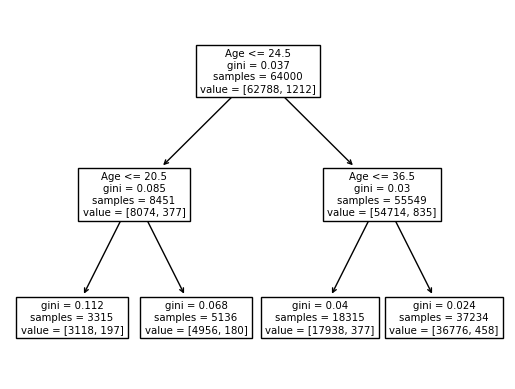

In [38]:
decision_bis_tree = tree.DecisionTreeClassifier(max_depth=2)
decision_bis_tree = decision_bis_tree.fit(X_bis_train, y_bis_train)
tree.plot_tree(decision_bis_tree, feature_names=list(X_bis_train.columns))

In [39]:
decision_bis_tree.score(X_bis_test, y_bis_test, sample_weight=None)

0.981

In [40]:
gouv_fil=gouv_fil.rename(columns={"Sexe_conducteur": "Gender", "Age_conducteur": "Age"}, errors="raise")

In [41]:
gouv_fil.head()

,id_vehicule,nb_conducteur,Age,nb_passager,nb_pieton,Age_passager,grav,Gender,Acc_grave
14,100 896,1,38.0,2,0,18.333333,2,1,0
15,100 897,1,33.0,1,0,18.500000,2,0,0
24,100 906,1,27.0,1,0,13.000000,3,0,1
30,100 912,1,57.0,1,0,25.500000,2,0,0
32,100 914,1,27.0,3,0,9.500000,1,0,0


In [42]:
gouv_fil["Age"] = gouv_fil["Age"].astype(int)
gouv_fil.head()

,id_vehicule,nb_conducteur,Age,nb_passager,nb_pieton,Age_passager,grav,Gender,Acc_grave
14,100 896,1,38,2,0,18.333333,2,1,0
15,100 897,1,33,1,0,18.500000,2,0,0
24,100 906,1,27,1,0,13.000000,3,0,1
30,100 912,1,57,1,0,25.500000,2,0,0
32,100 914,1,27,3,0,9.500000,1,0,0


In [43]:
X_gouv = gouv_fil[["Gender","Age"]]
y_gouv = gouv_fil[["Acc_grave"]]

Text(0, 0.5, "Nombre d'accident")

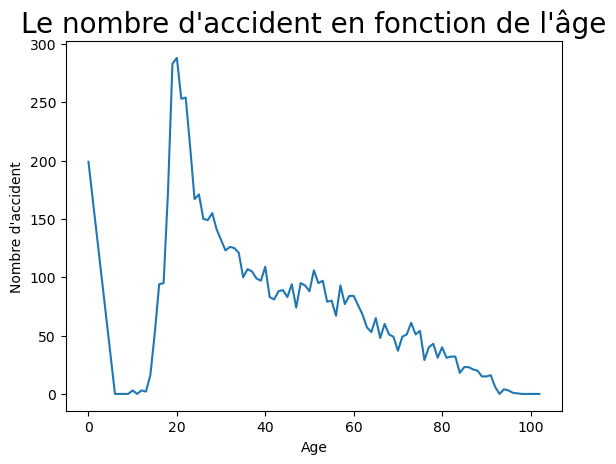

In [44]:
data_gouv_plot = gouv_fil.groupby("Age", as_index=False).agg({"Acc_grave":"sum"})

plt.plot(data_gouv_plot["Age"], data_gouv_plot["Acc_grave"])
plt.title("Le nombre d'accident en fonction de l'âge", fontsize=20)
plt.xlabel('Age')
plt.ylabel("Nombre d'accident")

In [45]:
decision_bis_tree.score(X_gouv, y_gouv , sample_weight=None)

0.7037345781927309

In [46]:
reg_bis_log.score(X_gouv, y_gouv)

0.7037345781927309

In [47]:
gouv2 = gouv_fil[(gouv_fil["Age"])>17]

Text(0, 0.5, "Nombre d'accident")

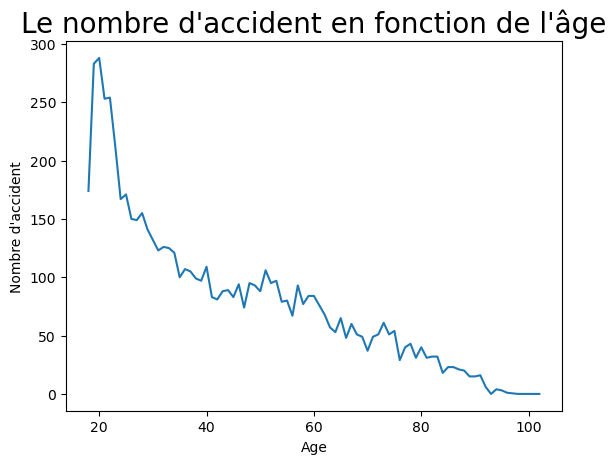

In [48]:
data_gouv_plot = gouv2.groupby("Age", as_index=False).agg({"Acc_grave":"sum"})

plt.plot(data_gouv_plot["Age"], data_gouv_plot["Acc_grave"])
plt.title("Le nombre d'accident en fonction de l'âge", fontsize=20)
plt.xlabel('Age')
plt.ylabel("Nombre d'accident")

In [ ]:
X_gouv2 = gouv2[["Gender","Age"]]
y_gouv2 = gouv2[["Acc_grave"]]

In [ ]:
X_gouv2 = X_gouv2.reset_index(drop = True)
X_gouv2

On voit que si on fait le split avant la boucle et que l'on teste avec X_sueil_test et y_sueil_test en ayant entrainé sur X_sueil_train et y_sueil_train

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1 fits failed out of a total of 3.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 68

score gouv [0.7037345806377817, 0.7037345806377817, 0.7037345806377817, 0.7037345806377817, 0.7037345806377817, 0.7037345806377817, 0.7037345806377817, 0.7037345806377817, 0.7037345806377817, 0.7037345806377817, 0.7037345806377817, 0.7037345806377817, 0.7037345806377817, 0.7037345806377817, 0.7037345806377817, 0.7037345806377817, 0.7037345806377817, 0.7037345806377817, 0.7037345806377817, 0.7037345806377817, 0.7037345806377817, 0.7037345806377817, 0.7037345806377817, 0.7037345806377817, 0.7037345806377817, 0.7037345806377817, 0.7037345806377817, 0.7037345806377817, 0.7037345806377817, 0.7037345806377817, 0.7037345806377817, 0.7037345806377817, 0.7037345806377817, 0.7037345806377817, 0.7037345806377817, 0.7037345806377817, 0.7037345806377817, 0.7037345806377817, 0.7037345806377817, 0.7037345806377817, 0.7037345806377817, 0.7037345806377817, 0.7037345806377817, 0.7037345806377817, 0.7037345806377817, 0.7037345806377817, 0.7037345806377817, 0.7037345806377817, 0.7037345806377817, 0.703734

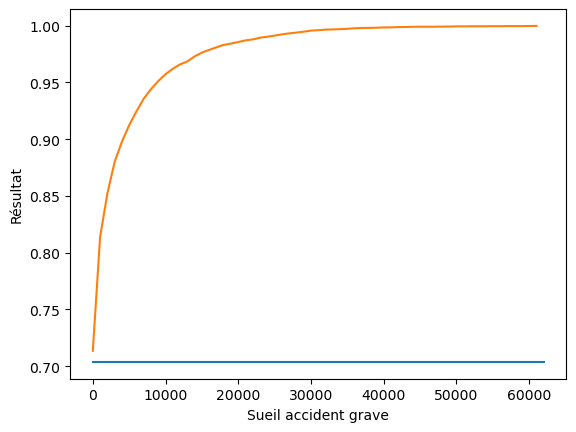

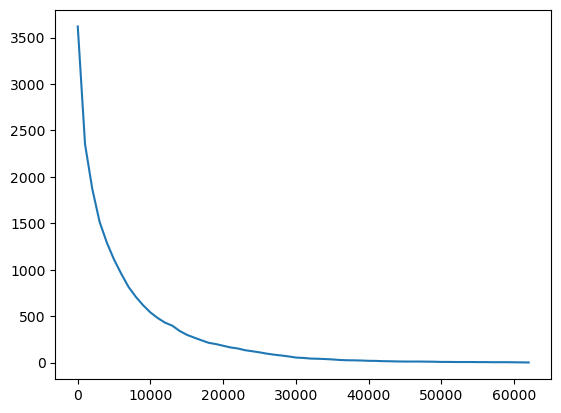

In [118]:
maxvariable = data_cook["Indtpbi"].max()
sueil_acc = list(range(0, int (maxvariable), 1000))
scores_sueil_gouv = []
scores_sueil_test=[]
nb_acc = []
#X_sueil_train, X_sueil_test, y_sueil_train, y_sueil_test = train_test_split(X_sueil, y_sueil, test_size=0.20,  shuffle=True)

for i in sueil_acc:
    data_sueil = data_cook[(data_cook["Numtppd"] + data_cook["Numtpbi"])>0]
    data_sueil["Acc_grave"] = np.where(data_sueil["Indtpbi"]>i, 1, 0) # faire boucle pour monter les 1000
    
    X_gouv = gouv_fil[["Gender","Age"]]
    y_gouv = gouv_fil[["Acc_grave"]]
    
    X_sueil = data_sueil[["Gender","Age"]]
    y_sueil = data_sueil[["Acc_grave"]]  
    
    #print (data_sueil[data_sueil["Acc_grave"] == 1].shape[0])
    logisticRegr = LogisticRegression()

    X_sueil_train, X_sueil_test, y_sueil_train, y_sueil_test = train_test_split(X_sueil, y_sueil, test_size=0.20,  shuffle=True)
    X_gouv_train, X_gouv_test, y_gouv_train, y_gouv_test = train_test_split(X_gouv, y_gouv, test_size=0.95,  shuffle=True)
    
    """"reg_sueil_log = reg_sueil_log.fit(X_sueil_train, y_sueil_train.values.ravel())
    scores_reg_gouv = reg_sueil_log.score(X_gouv_test, y_gouv_test)
    scores_sueil_gouv.append(scores_reg_gouv)"""
    
    scores_cros_reg_test = cross_val_score(logisticRegr, X_sueil, y_sueil.values.ravel(), cv=3, n_jobs=4)
    
    #scores_reg_sueil = reg_sueil_log.score(X_sueil_test, y_sueil_test) 
    scores_sueil_test.append(scores_cros_reg_test.mean())
    
    scores_cros_reg_gouv = cross_val_score(logisticRegr, X_gouv, y_gouv.values.ravel(), cv=3, n_jobs=4)
    scores_sueil_gouv.append(scores_cros_reg_gouv.mean())
    nb_acc.append(data_sueil[data_sueil["Acc_grave"] == 1].shape[0])

#print("The optimal number of threshold is {}".format(optimal_k))
plt.plot(sueil_acc, scores_sueil_gouv)
plt.plot(sueil_acc, scores_sueil_test)
print ("score gouv", scores_sueil_gouv)
#print ("score sueil", scores_sueil_test)
plt.xlabel("Sueil accident grave")
plt.ylabel("Résultat")
plt.show()

plt.plot(sueil_acc,nb_acc)
plt.show()


In [ ]:
Xgouv2 = X_gouv
ygouv2 = y_gouv
X_gouv_train, X_gouv_test, y_gouv_train, y_gouv_test = train_test_split(Xgouv2, ygouv2, test_size=0.95,  shuffle=False)
print (" type avant ", type(Xgouv2))
print ("\nType apres ", type (X_gouv_test))
print(Xgouv2.head(3))
print(X_gouv_test.head(3))
print (" type avant Y ", type(ygouv2))
print ("Type apres Y", type (y_gouv_test))
print(ygouv2.head(3))
print(y_gouv_test.head(3))

In [ ]:
data_sueil = data_cook
data_sueil["Acc_grave"] = np.where(data_cook["Indtpbi"]>2000, 1, 0) 
X_sueil = data_sueil[["Gender","Age"]]
y_sueil = data_sueil[["Acc_grave"]] 

reg_sueil_log = LogisticRegression()

X_sueil_train, X_sueil_test, y_sueil_train, y_sueil_test = train_test_split(X_sueil, y_sueil, test_size=0.20,  shuffle=True)
scores_cros_reg = cross_val_score(reg_sueil_log, X_sueil_test, y_sueil_test, cv=5)



In [ ]:
scores_cros_reg.mean()

On va tester avec l'arbre de décision car on aurait peut être un phénomène d'antiselection et de surapprentissage

### Test avec les sueil de supérieur à 1300 euros 

Text(0.5, 1.0, 'Score de la régression \n En orange: portefeuille \n En bleu: gouvernement')

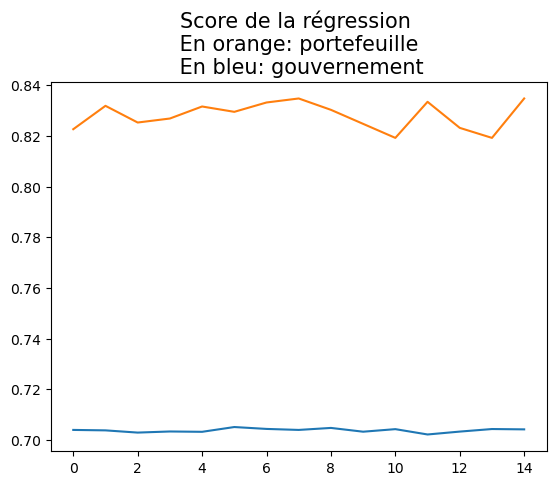

In [129]:
scores_gouv = []
scores_port=[]
inc = list(range(0, 15, 1))

for i in inc:
    data_sueil = data_cook[(data_cook["Numtppd"] + data_cook["Numtpbi"])>0]
    data_sueil["Acc_grave"] = np.where(data_sueil["Indtpbi"]>1300, 1, 0) 
    
    X_gouv = gouv_fil[["Gender","Age"]]
    y_gouv = gouv_fil[["Acc_grave"]]
    
    X_sueil = data_sueil[["Gender","Age"]]
    y_sueil = data_sueil[["Acc_grave"]]  
    
    logisticRegr = LogisticRegression()

    X_sueil_train, X_sueil_test, y_sueil_train, y_sueil_test = train_test_split(X_sueil, y_sueil, test_size=0.30,  shuffle=True)
    X_gouv_train, X_gouv_test, y_gouv_train, y_gouv_test = train_test_split(X_gouv, y_gouv, test_size=0.95,  shuffle=True)
    
    reg_sueil_log = logisticRegr.fit(X_sueil_train, y_sueil_train.values.ravel())
    scores_reg_pt = reg_sueil_log.score(X_sueil_test, y_sueil_test)
    scores_reg_gouv = reg_sueil_log.score(X_gouv_test, y_gouv_test)
    scores_gouv.append(scores_reg_gouv)
    scores_port.append(scores_reg_pt)

plt.plot(list(range(0, 15, 1)),scores_gouv)
plt.plot(list(range(0, 15, 1)),scores_port )
plt.title("Score de la régression \n En orange: portefeuille \n En bleu: gouvernement", fontsize=15)


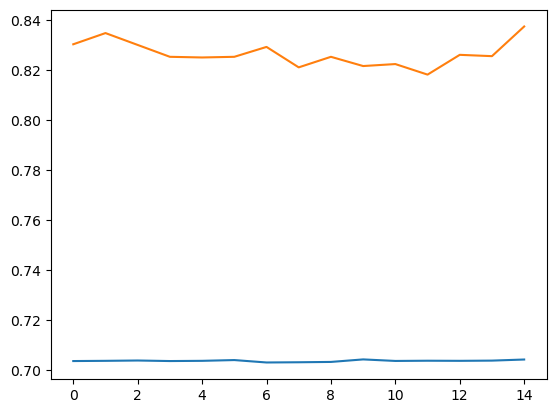

In [117]:
plt.plot(list(range(0, 15, 1)),scores_gouv)
plt.plot(list(range(0, 15, 1)),scores_port )


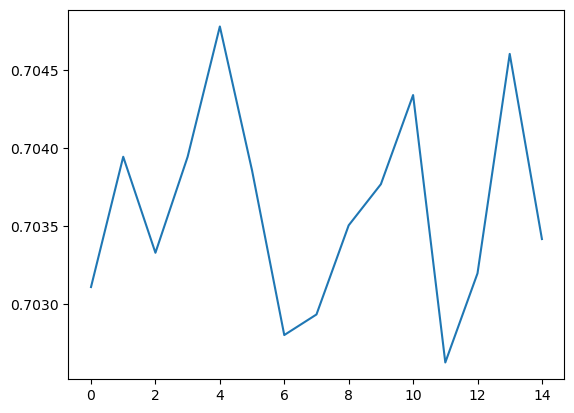

In [108]:
plt.plot(list(range(0, 15, 1)),scores_gouv)

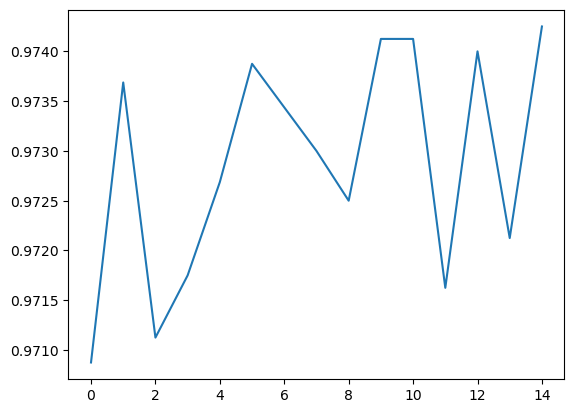

In [109]:
plt.plot(list(range(0, 15, 1)),scores_port )

### Test avec les x% supérieur

On comptabilise le nombre d'accident de gravité 3 ou 4 et on divise par le nombre d'accident total

In [115]:
len(gouv_fil[(gouv_fil['grav']>2)])/len(gouv_fil[(gouv_fil['grav']>0)])

0.2962654218072691

In [125]:
data_sueil = data_cook[(data_cook["Numtppd"] + data_cook["Numtpbi"])>0]

data_sueil[["Indtpbi"]].describe()


,Indtpbi
count,12632.000000
mean,1417.783867
std,4479.111561
min,0.000000
25%,0.000000
50%,0.000000
75%,129.623037
max,62092.741637


On va donc sélectionner le 3ème quartile comme sueil et tester 

Text(0.5, 1.0, 'Score de la régression \n En orange: portefeuille \n En bleu: gouvernement')

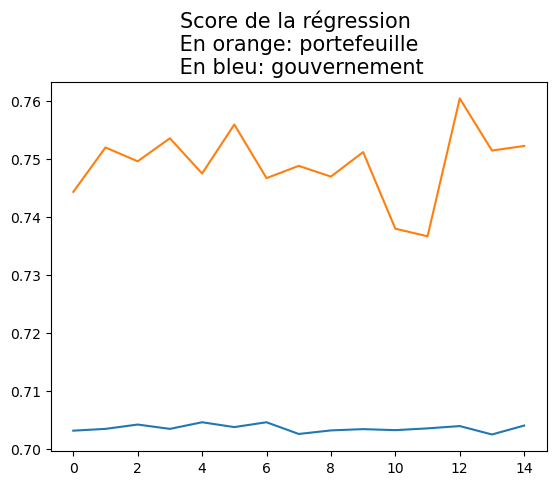

In [130]:
scores_gouv = []
scores_port=[]
inc = list(range(0, 15, 1))

for i in inc:
    data_sueil = data_cook[(data_cook["Numtppd"] + data_cook["Numtpbi"])>0]
    data_sueil["Acc_grave"] = np.where(data_sueil["Indtpbi"]>130, 1, 0) 
    
    X_gouv = gouv_fil[["Gender","Age"]]
    y_gouv = gouv_fil[["Acc_grave"]]
    
    X_sueil = data_sueil[["Gender","Age"]]
    y_sueil = data_sueil[["Acc_grave"]]  
    
    logisticRegr = LogisticRegression()

    X_sueil_train, X_sueil_test, y_sueil_train, y_sueil_test = train_test_split(X_sueil, y_sueil, test_size=0.30,  shuffle=True)
    X_gouv_train, X_gouv_test, y_gouv_train, y_gouv_test = train_test_split(X_gouv, y_gouv, test_size=0.95,  shuffle=True)
    
    reg_sueil_log = logisticRegr.fit(X_sueil_train, y_sueil_train.values.ravel())
    scores_reg_pt = reg_sueil_log.score(X_sueil_test, y_sueil_test)
    scores_reg_gouv = reg_sueil_log.score(X_gouv_test, y_gouv_test)
    scores_gouv.append(scores_reg_gouv)
    scores_port.append(scores_reg_pt)

plt.plot(list(range(0, 15, 1)),scores_gouv)
plt.plot(list(range(0, 15, 1)),scores_port )
plt.title("Score de la régression \n En orange: portefeuille \n En bleu: gouvernement", fontsize=15)


In [ ]:
maxvariable = data_cook["Indtpbi"].max()
sueil_acc = list(range(0, int (maxvariable), 5000))
scores_sueil_gouv = []
scores_sueil_test=[]
nb_acc = []
#X_sueil_train, X_sueil_test, y_sueil_train, y_sueil_test = train_test_split(X_sueil, y_sueil, test_size=0.20,  shuffle=True)

for i in sueil_acc:
    data_sueil = data_cook
    data_sueil["Acc_grave"] = np.where(data_cook["Indtpbi"]>i, 1, 0) # faire boucle pour monter les 1000
    X_gouv = gouv_fil[["Gender","Age"]]
    y_gouv = gouv_fil[["Acc_grave"]]
    X_sueil = data_sueil[["Gender","Age"]]
    y_sueil = data_sueil[["Acc_grave"]]  
    #print (data_sueil[data_sueil["Acc_grave"] == 1].shape[0])
    logisticRegr = LogisticRegression(solver = 'lbfgs')
    X_sueil_train, X_sueil_test, y_sueil_train, y_sueil_test = train_test_split(X_sueil, y_sueil, test_size=0.20,  shuffle=True)
    X_gouv_train, X_gouv_test, y_gouv_train, y_gouv_test = train_test_split(X_gouv2, y_gouv2, test_size=0.95,  shuffle=True)
    reg_sueil_log =  logisticRegr.fit(X_sueil_train, y_sueil_train.values.ravel())
    scores_reg_gouv = reg_sueil_log.score( X_gouv_test, y_gouv_test) 
    scores_sueil_gouv.append(scores_reg_gouv)
    scores_reg_sueil = reg_sueil_log.score( X_sueil_test, y_sueil_test) 
    scores_sueil_test.append(scores_reg_sueil)
    nb_acc.append(data_sueil[data_sueil["Acc_grave"] == 1].shape[0])

#print("The optimal number of threshold is {}".format(optimal_k))
plt.plot(sueil_acc, scores_sueil_gouv)
plt.plot(sueil_acc, scores_sueil_test)
print("score gouv", scores_sueil_gouv, "score sueil", scores_sueil_test)
plt.xlabel("Sueil accident grave")
plt.ylabel("Résultat")
plt.show()

plt.plot(sueil_acc,nb_acc)
plt.show()

In [ ]:
maxvariable = data_cook["Indtpbi"].max()
sueil_acc = list(range(0, int (maxvariable), 5000))
scores_sueil = []
nb_acc = []
X_sueil_train, X_sueil_test, y_sueil_train, y_sueil_test = train_test_split(X_sueil, y_sueil, test_size=0.20,  shuffle=True)

for i in sueil_acc:
    data_sueil = data_cook
    data_sueil["Acc_grave"] = np.where(data_cook["Indtpbi"]>i, 1, 0) # faire boucle pour monter les 1000
    X_gouv = gouv_fil[["Gender","Age"]]
    y_gouv = gouv_fil[["Acc_grave"]]
    X_sueil = data_sueil[["Gender","Age"]]
    y_sueil = data_sueil[["Acc_grave"]]  
    #print (data_sueil[data_sueil["Acc_grave"] == 1].shape[0])
    logisticRegr = LogisticRegression(solver = 'lbfgs')
    X_sueil_train, X_sueil_test, y_sueil_train, y_sueil_test = train_test_split(X_sueil, y_sueil, test_size=0.20,  shuffle=True)
    reg_sueil_log =  logisticRegr.fit(X_sueil_train, y_sueil_train.values.ravel())
    scores_reg = reg_sueil_log.score(X_sueil_test, y_sueil_test)  
    scores_sueil.append(scores_reg)
    nb_acc.append(data_sueil[data_sueil["Acc_grave"] == 1].shape[0])

#print("The optimal number of threshold is {}".format(optimal_k))
plt.plot(sueil_acc, scores_sueil)
plt.xlabel("Sueil accident grave")
plt.ylabel("Résultat")
plt.show()

plt.plot(sueil_acc,nb_acc)
plt.show()


In [ ]:
maxvariable = data_cook["Indtpbi"].max()
sueil_acc = list(range(0, int (maxvariable), 5000))
scores_sueil = []
nb_acc = []
#X_sueil_train, X_sueil_test, y_sueil_train, y_sueil_test = train_test_split(X_sueil, y_sueil, test_size=0.20,  shuffle=True)

for i in sueil_acc:
    data_sueil = data_cook
    data_sueil["Acc_grave"] = np.where(data_cook["Indtpbi"]>i, 1, 0) # faire boucle pour monter les 1000
    X_gouv = gouv_fil[["Gender","Age"]]
    y_gouv = gouv_fil[["Acc_grave"]]
    X_sueil = data_sueil[["Gender","Age"]]
    y_sueil = data_sueil[["Acc_grave"]]  
    #print (data_sueil[data_sueil["Acc_grave"] == 1].shape[0])
    logisticRegr = LogisticRegression(solver = 'lbfgs')
    X_sueil_train, X_sueil_test, y_sueil_train, y_sueil_test = train_test_split(X_sueil, y_sueil, test_size=0.20,  shuffle=True)
    X_gouv_train, X_gouv_test, y_gouv_train, y_gouv_test = train_test_split(X_gouv2, y_gouv2, test_size=0.95,  shuffle=True)
    reg_sueil_log =  logisticRegr.fit(X_sueil_train, y_sueil_train.values.ravel())
    scores_reg =  cross_val_score(reg_sueil_log, X_gouv_test, y_gouv_test, cv=10)
    scores_sueil.append(scores_reg.mean())
    nb_acc.append(data_sueil[data_sueil["Acc_grave"] == 1].shape[0])

#print("The optimal number of threshold is {}".format(optimal_k))
plt.plot(sueil_acc, scores_sueil)
plt.xlabel("Sueil accident grave")
plt.ylabel("Résultat")
plt.show()

plt.plot(sueil_acc,nb_acc)
plt.show()

In [ ]:
maxvariable = data_cook["Indtpbi"].max()
sueil_acc = list(range(0, int (maxvariable), 10000))
scores_sueil = []
nb_acc = []

for i in sueil_acc:
    data_sueil = data_cook
    data_sueil["Acc_grave"] = np.where(data_cook["Indtpbi"]>i, 1, 0) # faire boucle pour monter les 1000
    X_gouv = gouv_fil[["Gender","Age"]]
    y_gouv = gouv_fil[["Acc_grave"]]
    X_sueil = data_sueil[["Gender","Age"]]
    y_sueil = data_sueil[["Acc_grave"]]  
    #print (data_sueil[data_sueil["Acc_grave"] == 1].shape[0])
    X_sueil_train, X_sueil_test, y_sueil_train, y_sueil_test = train_test_split(X_sueil, y_sueil, test_size=0.20,  shuffle=True)
    logisticRegr = LogisticRegression(solver = 'lbfgs')
    reg_sueil_log =  logisticRegr.fit(X_sueil, y_sueil)
    scores_reg = reg_sueil_log.score(X_gouv2, y_gouv2)    
    scores_sueil.append(scores_reg)
    nb_acc.append(data_sueil[data_sueil["Acc_grave"] == 1].shape[0])

#print("The optimal number of threshold is {}".format(optimal_k))
plt.plot(sueil_acc, scores_sueil)
plt.xlabel("Sueil accident grave")
plt.ylabel("Résultat")
plt.show()

plt.plot(sueil_acc,nb_acc)
plt.show()


In [ ]:
scores_sueil = []
nb_acc = []
array_LR=[]
for i in range(0, 60000, 10000):
    data_sueil = data_cook
    data_sueil["Acc_grave"] = np.where(data_cook["Indtpbi"]>i, 1, 0) # faire boucle pour monter les 1000
    
    X_sueil = data_sueil[["Gender","Age"]]
    y_sueil = data_sueil[["Acc_grave"]]  
    #print (data_sueil[data_sueil["Acc_grave"] == 1].shape[0])
    X_sueil_train, X_sueil_test, y_sueil_train, y_sueil_test = train_test_split(X_sueil, y_sueil, test_size=0.2, random_state=42, shuffle=True)
    reg_sueil_log =  LogisticRegression().fit(X_sueil,y_sueil.values.ravel())
    array_LR.append(reg_sueil_log)
    scores_reg = reg_sueil_log.score(X_gouv, y_gouv.values.ravel())    
    scores_sueil.append(scores_reg)
    nb_acc.append(data_sueil[data_sueil["Acc_grave"] == 1].shape[0])

#print("The optimal number of threshold is {}".format(optimal_k))
#plt.plot(sueil_acc, scores_sueil)
#plt.xlabel("Sueil accident grave")
#plt.ylabel("Résultat")
#plt.show()

#plt.plot(sueil_acc,nb_acc)
#plt.show()

In [ ]:
print(type(X_gouv2["Gender"][2]), type(X_sueil["Gender"][2]))
print(type(X_gouv2["Age"][2]), type(X_sueil["Age"][2]))

In [ ]:
X_gouv2["Age"]=X_gouv2["Age"].astype('int64')

In [ ]:
print(type(y_gouv2["Acc_grave"][2]), type(y_sueil["Acc_grave"][2]))

In [ ]:
y_gouv2 =y_gouv
y_gouv2 = y_gouv2.reset_index(drop = True)

In [ ]:
np.where(data_cook["Indtpbi"]>i, 1, 0)

In [ ]:
print(nb_acc)

In [ ]:
maxvariable = data_cook["Indtpbi"].max()
sueil_acc = list(range(0, int (maxvariable), 10000))
scores_sueil = []
nb_acc = []

for i in sueil_acc:
    data_sueil = data_cook
    data_sueil["Acc_grave"] = np.where(data_cook["Indtpbi"]>i, 1, 0) # faire boucle pour monter les 1000
    
    X_sueil = data_sueil[["Gender","Age"]]
    y_sueil = data_sueil[["Acc_grave"]]    
    X_sueil_train, X_sueil_test, y_sueil_train, y_sueil_test = train_test_split(X_sueil, y_sueil, test_size=0.20, shuffle=True)
    
    decision_bis_tree = tree.DecisionTreeClassifier(max_depth=2)
    decision_bis_tree = decision_bis_tree.fit(X_sueil_train, y_sueil_train.values.ravel())
    scores = decision_bis_tree.score(X_gouv, y_gouv)    
    print(scores)
    scores_sueil.append(scores)
    nb_acc.append(data_sueil[data_sueil["Acc_grave"] == 1].shape[0])

#print("The optimal number of threshold is {}".format(optimal_k))
plt.plot(sueil_acc, scores_sueil)
plt.xlabel("Sueil accident grave")
plt.ylabel("Résultat")
plt.show()

plt.plot(sueil_acc,nb_acc)
plt.show()
